# Entropy and Mutual Information

Let's talk about `entropy` and `mutual information`. Entropy is understood in a couple of different ways. From a lay perspective, entropy is the magnitude of surprise; when something has a high level of surprise, then it has high entropy. But what is surprise? Surprise can be defined as the level of uncertainty; if knowing something is highly uncertain, then there is a lot of surprise to be expected.

Take for example knowing the weather. Let's say the weather can be in any number of states: sunny, cloudy, rainy. If it is always sunny and never cloudy or rainy, then the weather is said to be not surprising or having very little uncertainty. However, when the weather can be equally sunny, cloudy or rainy, then it is very difficult to know and/or guess what the weather will be; for all states are equally probable. There is high uncertainty or a high level of surprise when the states of the weather are equally probable.

As you can see, weather is a categorical variable having 3 states; sunny, cloudy or rainy. Each state takes on a probability such that adding all these probabilities must sum to 1. The distribution of the states/values of weather is called the `probability mass function`. When the state probabilities are all equal, then there is maximal entropy; when one state is only possible, then there is minimal entropy. 

Before we compute an example for each of this situations, let's see how entropy is defined.

- $H(X) = -\sum_i p(x_i) \log p(x_i)$,

where

- $X$ is a variable 
- $p(x_i)$ is the probability of the i-th value of $X$
- $H(X)$ is the entropy

If you recall, $\log x$, where the domain is $x \in [0, 1]$, has the range $[-\infty, 0]$. Thus, $\log x$ is always negative, that is why after we sum over negatives, we add a negative at the front to convert $H(X)$ to positive. When $p(x_i) = 1$ then $\log p(x_i) = \log 1 = 0$. As $p(x_i)$ tends to zero, then $\log p(x_i)$ tends to $-\infty$. In fact, in practice, if $p(x_i) = 0$, then in many applications $\log p(x_i) = \log 0$ is simply discarded. This makes sense, since if there is no chance of observing a value/state, then it is like the value/state does not even exist. 

Let's visualize the natural log, $\log_e$, log base 2, $\log_2$ and log base 10, $\log_{10}$, for the probabilities in the range [0, 1].

In [1]:
import numpy as np
import pandas as pd
import random

np.random.seed(37)
random.seed(37)

p = np.arange(0.01, 1.01, 0.01)
log_p = np.log(p)
log2_p = np.log2(p)
log10_p = np.log10(p)

df = pd.DataFrame({
    'log_p': log_p,
    'log2_p': log2_p,
    'log10_p': log10_p
}, index=p)

df.head()

,log_p,log2_p,log10_p
0.01,-4.605170,-6.643856,-2.000000
0.02,-3.912023,-5.643856,-1.698970
0.03,-3.506558,-5.058894,-1.522879
0.04,-3.218876,-4.643856,-1.397940
0.05,-2.995732,-4.321928,-1.301030


As you can see below, $\log_{10}$ tends to $-\infty$ slowest, followed by $\log_e$ and then $\log_2$. The entropy is said to be 

- in `bit` unit when the base is `2`, 
- in `natural` unit when the base is `e`, and 
- in `dat` units when the base is `10`.

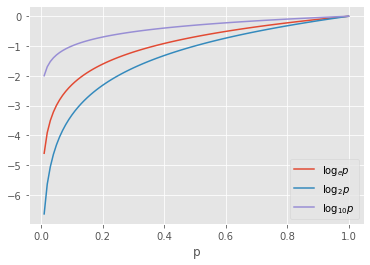

In [2]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()

_ = df.log_p.plot(kind='line', ax=ax, label=r'$\log_e p$')
_ = df.log2_p.plot(kind='line', ax=ax, label=r'$\log_2 p$')
_ = df.log10_p.plot(kind='line', ax=ax, label=r'$\log_{10} p$')

_ = ax.set_xlabel('p')
_ = ax.legend()

Now, let's go back to the weather example and assume the following states and probabilities.

- sunny: 0.98
- cloudy: 0.01
- rainy: 0.01

Let's compute the entropy.

In [3]:
probs = [0.98, 0.01, 0.01]
H = -sum([p * np.log(p) for p in probs])
H

0.11190205689093088

Now, let's say the states are nearly equally probable.

- sunny: 0.33
- cloudy: 0.33
- rainy: 0.33

What's the entropy?

In [4]:
probs = [0.33, 0.33, 0.33]
H = -sum([p * np.log(p) for p in probs])
H

1.097575998276395

Again, this simple example is to highlight that high entropy means more uncertainty (more surprise), and low entropy means less uncertainty (less surprise).

Here's an easy example showing a variable with only 2 states. We can visualize what happens to the entropy as the probabilty of one of those states changes from nearly zero to nearly 1.

In [5]:
compute_entropy = lambda probs: -sum([p * np.log(p) for p in probs])

df = pd.DataFrame([{'p': p, 'H': compute_entropy([p, 1.0 - p])} 
                   for p in np.arange(0.01, 1.0, 0.01)])
df.head()

,p,H
0,0.01,0.056002
1,0.02,0.098039
2,0.03,0.134742
3,0.04,0.167944
4,0.05,0.198515


As you can see, entropy is maximal when the probability of one of those states is at `0.5` (when both states have equal probabilities).

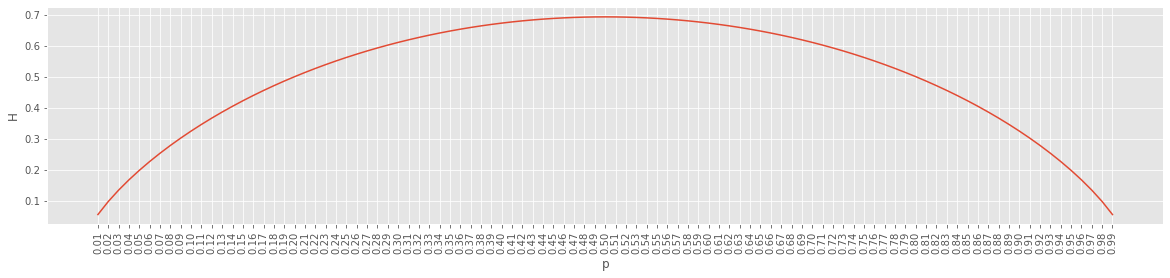

In [6]:
ax = df.plot(kind='line', x='p', y='H', figsize=(20, 4))
ax.set_ylabel('H')
ax.get_legend().remove()
_ = ax.set_xticks(df.p)
_ = ax.set_xticklabels([f'{p:.2f}' for p in df.p], rotation=90)

The entropy value is unbounded and in the range $[0, \infty]$. However, we can `normalize` entropy, $\eta(X)$, with dividing by $\log n$ where $n$ is the total number of observations. 

- $\eta(X) = \frac{H(X)}{H_{\mathrm{max}}} = \frac{H(X)}{\log n}$

A normalized entropy brings the value back into unit $[0, 1]$ which may be more convenient to work with. If you think about it, $\log n$ is the entropy when we have $n$ observations and also $n$ unique values; it is the maximum entropy possible when we have uniform distribution over all values.

- $p(x) \log p(x) \leq H_{\mathrm{max}}$
- $\eta(X) \in [0, 1]$

Here's a plot of normalized entropy for a variable with 2 values while varying the probability of one of those values from [0, 1].

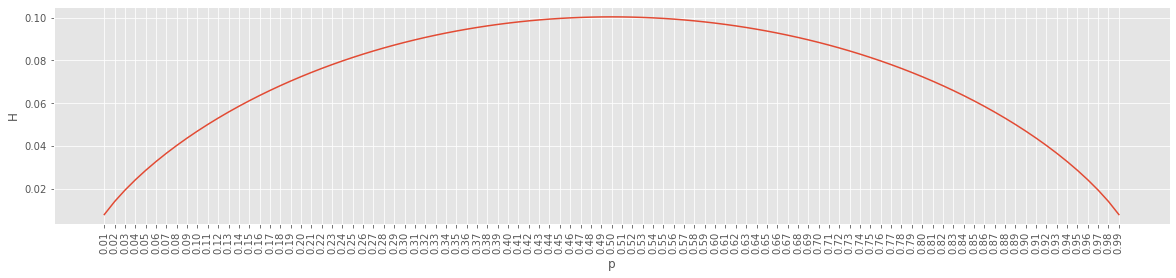

In [7]:
compute_entropy = lambda probs, n: -sum([p * np.log(p) for p in probs]) / np.log(n)

df = pd.DataFrame([{'p': p, 'H': compute_entropy([p, 1.0 - p], 1000)} 
                   for p in np.arange(0.01, 1.0, 0.01)])

ax = df.plot(kind='line', x='p', y='H', figsize=(20, 4))
ax.set_ylabel('H')
ax.get_legend().remove()
_ = ax.set_xticks(df.p)
_ = ax.set_xticklabels([f'{p:.2f}' for p in df.p], rotation=90)

Entropy is also called self-information. When interested in the information between two variables, we use mutual information. Mutual information bewteen two variables $X$ and $Y$ is denoted $I(X;Y)$ and defined as follows.

- $I(X;Y) = \sum_X \sum_Y p(x, y) \log \frac{p(x, y)}{p(x) p(y)}$

Note that $p(x, y)$ is the `joint distribution` and $\log \frac{p(x, y)}{p(x) p(y)}$ is called the `pointwise mutual information`.

Mutual information is also unbounded like entropy $[0, \infty]$. There are also normalized forms of $I(X;Y)$ as well, normalized mutual information `NMI`, which is in the range $[0, 1]$.

The following NMI are asymmetric and called `coefficient of constraint`, `uncertainty coefficient` or `proficiency`.

- $C(X;Y) = \frac{I(X;Y)}{H(Y)}$
- $C(Y;X) = \frac{I(X;Y)}{H(X)}$

Below, $R(X;Y)$ is called the `redundancy` measure and $U(X;Y)$ is called `symmetric uncertainty`.

- $R(X;Y) = \frac{I(X;Y)}{H(X) + H(Y)}$
- $U(X;Y) = 2R$

`Dual total correlation` or `Information Quality Ratio` IQR is given as follows.

- $\mathrm{IQR}=\frac{I^*(X;Y)}{H(X, Y)}$, where 
  - $I^*(X;Y)=\sum_X \sum_Y p(x,y) \log p_x p_y$
  - $H(X, Y)=\sum_X \sum_Y p(x,y) \log p(x,y)$
  
A NMI that can be computed similar to Pearson correlation coefficient is given as follows.

- $P(X;Y) = \frac{I(X;Y)}{\sqrt{H(X)H(Y)}}$

The interpretation of mutual information is a value closer to zero indicates less association between two variables; a value farther away from zero indicates more association between two variables. In terms of certainty; a value closer to zero indicates knowing about one variable does not reduce uncertainty about another; a value farther from zero indicates knowing about one variable does reduce uncertainty about another. 

Compare the interpretation of entropy with mutual information. For entropy, a higher value indicates more uncertainty or more surprise for that individual variable. For mutual information, a higher value indicates less uncertainty or less surprise for those two variables. 

Let's simulate some data about a scenario about the weather, umbrella usage and food. Let's define these variables as binary and as follows.

- rain: is it rainy or not? 0 is no rain; 1 is rain.
- umbrella: do we bring an umbrella with us or not? 0 is no umbrella; 1 is bringing an umbrella.
- food: do we eat pizza or not? 0 is no pizza; 1 is eating pizza.

Let's say these are the probabilities and dependencies between the three variables.

- rain: it rains 45% of the time and 55% it does not rain
- umbrella
  - when it rains, we bring an umbrella 90% of the time and we do not bring one 10% of the time
  - when it does not rain, we bring an umbrella 10% of the time and we do not bring one 90% of the time
- pizza: we eat pizza 50% of the time

Then we can simulate events (records) as follows.

In [8]:
def get_data(n=100):
    def get_rain():
        p = np.random.random()
        if p < 0.45:
            return 1
        return 0
    
    def get_umbrella(rain):
        p = np.random.random()
        if rain == 0:
            if p < 0.1:
                return 1
            else:
                return 0
        else:
            if p < 0.9:
                return 1
            else:
                return 0
    
    def get_pizza():
        p = np.random.random()
        if p < 0.5:
            return 1
        return 0
    
    def get_event():
        rain = get_rain()
        umbrella = get_umbrella(rain)
        pizza = get_pizza()
        
        return {'rain': rain, 'umbrella': umbrella, 'pizza': pizza}
    
    return pd.DataFrame([get_event() for _ in range(n)])

df = get_data()
df.head()

,rain,umbrella,pizza
0,0,0,1
1,0,0,0
2,1,1,1
3,0,0,0
4,1,0,0


Now let's compute the mutual information and normalized mutual information. Check these results with `sklearn` and `scipy`.

- [SciPy Entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html)
- [sklearn mutual information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html)
- [sklearn normalized mutual information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)

In [9]:
from itertools import combinations

def compute_entropy(field):
    values = df[field].value_counts()
    n = values.sum()
    probs = [v / n for v in values]
    H = -sum([p * np.log(p) for p in probs if p > 0.0])
    return H

def compute_mi(x, y):
    def compute_pmi(xy_c, x_c, y_c, xy_n, x_n, y_n):
        a = xy_c / xy_n
        b = x_c / x_n
        c = y_c / y_n
        d = a / (b * c)
        
        if b == 0 or c == 0 or d == 0:
            return 0
        
        return a * np.log(d)
    
    def compute_joint_entropy(probs):
        return sum([p * np.log(p) for p in probs])
        
    xy_00 = df[(df[x]==0) & (df[y]==0)].shape[0]
    xy_01 = df[(df[x]==0) & (df[y]==1)].shape[0]
    xy_10 = df[(df[x]==1) & (df[y]==0)].shape[0]
    xy_11 = df[(df[x]==1) & (df[y]==1)].shape[0]
    xy_n = xy_00 + xy_01 + xy_10 + xy_11
    
    x_0 = df[df[x]==0].shape[0]
    x_1 = df[df[x]==1].shape[0]
    x_n = x_0 + x_1
    
    y_0 = df[df[y]==0].shape[0]
    y_1 = df[df[y]==1].shape[0]
    y_n = y_0 + y_1
    
    values = [
        compute_pmi(xy_00, x_0, y_0, xy_n, x_n, y_n),
        compute_pmi(xy_01, x_0, y_1, xy_n, x_n, y_n),
        compute_pmi(xy_10, x_1, y_0, xy_n, x_n, y_n),
        compute_pmi(xy_11, x_1, y_1, xy_n, x_n, y_n)
    ]
    
    MI = sum(values)
    H_X = compute_entropy(x)
    H_Y = compute_entropy(y)
    
    values = [
        (xy_00/xy_n, x_0/x_n, y_0/y_n),
        (xy_01/xy_n, x_0/x_n, y_1/y_n),
        (xy_10/xy_n, x_1/x_n, y_0/y_n),
        (xy_11/xy_n, x_1/x_n, y_1/y_n)
    ]
    
    I_XY = sum([p_xy * np.log(p_x * p_y) for p_xy, p_x, p_y in values])
    H_XY = compute_joint_entropy([xy_00/xy_n, xy_01/xy_n, xy_10/xy_n, xy_11/xy_n])
    
    C_XY = MI / H_Y
    C_YX = MI / H_X
    R = MI / (H_X + H_Y)
    U = 2 * R
    IQR = (I_XY / H_XY) - 1
    P = MI / np.sqrt(H_X * H_Y)
    
    return {
        'X': x,
        'Y': y,
        'H(X)': H_X,
        'H(Y)': H_Y,
        'H(X,Y)': H_XY,
        'I(X;Y)': MI,
        'R(X;Y)': R,
        'U(X;Y)': U,
        'C(X;Y)': C_XY,
        'C(Y;X)': C_YX,
        'IQR(X,Y)': IQR,
        'P(X;Y)': P
        
    }

pd.DataFrame([compute_mi(x, y) for x, y in combinations(df.columns, 2)])

,X,Y,H(X),H(Y),"H(X,Y)",I(X;Y),R(X;Y),U(X;Y),C(X;Y),C(Y;X),"IQR(X,Y)",P(X;Y)
0,rain,umbrella,0.692947,0.689944,-1.069149,0.313742,0.226874,0.453748,0.454736,0.452765,0.293450,0.453749
1,rain,pizza,0.692947,0.689944,-1.381173,0.001718,0.001242,0.002484,0.002490,0.002479,0.001244,0.002484
2,umbrella,pizza,0.689944,0.689944,-1.379316,0.000572,0.000414,0.000829,0.000829,0.000829,0.000414,0.000829
